<h2><center>ANALYSIS ZOMATO DATASET</center></h2>

### ABOUT DATASET

#### 
   - <b> url </b>:  contains the url of the restaurant in the zomato website

   - <b> address </b> :  contains the address of the restaurant in Bengaluru

   - <b> name </b>:  contains the name of the restaurant

   - <b> online_order </b> :  whether online ordering is available in the restaurant or not

   - <b> book_table</b> :  table book option available or not

   - <b> rate </b> :  contains the overall rating of the restaurant out of 5

   - <b> votes </b> :  contains total number of rating for the restaurant as of the above mentioned date

   - <b> phone </b> :  contains the phone number of the restaurant

   - <b> location </b> :  contains the neighborhood in which the restaurant is located

   - <b> rest_type </b> :  restaurant type

   - <b> dish_liked </b> :  dishes people liked in the restaurant

   - <b> cuisines </b> :  food styles, separated by comma

   - <b> approx_cost(for two people) </b> :  contains the approximate cost for meal for two people

   - <b> reviews_list </b> :  list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
 
   - <b> menu_item </b> :  contains list of menus available in the restaurant

   - <b> listed_in(type) </b> :  type of meal

   - <b> listed_in(city) </b> :  contains the neighborhood in which the restaurant is listed

####  

#### IMPORTING PACKAGES

##### FOR ACCESSING CLIENT

In [49]:
# !pip install pymongo
# !pip install plotly
# !pip install kaggle


In [50]:
# !ls

'Number of orders in each hotel in Bangalore.json'
'Number of orders in each Location.json'
 Part_2.ipynb
 reference.ipynb
 zomato.csv
 zomato.csv.zip
 zomato-data-analysis-using-mongodb.ipynb
 zomato_recommendation_data.csv


In [51]:
# !unzip zomato.csv.zip


Archive:  zomato.csv.zip
replace zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import pymongo
from pymongo import MongoClient 
    


In [2]:


# Connect with the portnumber and host  
client = MongoClient("mongodb://localhost:27017/")  


##### FOR PREPROCESSING

In [3]:
import pandas as pd
import json
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import plotly.offline as pyo
from matplotlib import style
from plotly.offline import init_notebook_mode, plot ,iplot
plt.rcParams['figure.figsize'] = 17,7
style.use("ggplot")
pyo.init_notebook_mode(connected=True)


#### READING AND ANALYSING THE DATASET

##### ACCESSING DATABASE

In [7]:
dblist=client.list_database_names()
dblist

['admin', 'config', 'local']

In [8]:
# Access database  
mydb = client['admin'] 
collection = mydb['zomo']

In [12]:
# checking for changes
list(collection.find())

[{'_id': ObjectId('67164cd566adaefd63e519df'),
  'url': 'https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19',
  'address': '942, 21st Main Road, 2nd Stage, Banashankari, Bangalore',
  'name': 'Jalsa',
  'online_order': 'Yes',
  'book_table': 'Yes',
  'rate': '4.1/5',
  'votes': 775,
  'phone': '080 42297555\r\n+91 9743772233',
  'location': 'Banashankari',
  'rest_type': 'Casual Dining',
  'dish_liked': 'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
  'cuisines': 'North Indian, Mughlai, Chinese',
  'approx_cost(for two people)': 800,
  'reviews_list': '[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited 

### 0. Number of hotels in Bangalore

In [13]:
q0_agg_result=collection.aggregate([{ "$group": {"_id": "$name", "count": { "$sum": 1 } } }])

In [14]:
len(list(q0_agg_result))

8792

#### Inference
    - From this we can get number of food spots in Banglore which is in collaboration with Zomato......  

### 1. Number of orders in each Location

In [15]:
q1_agg_result=collection.aggregate([{ "$group": {"_id": "$listed_in(city)", "count": { "$sum": 1 } } },
                                 {"$sort": { "count": -1 } }])


In [16]:
result_list = list(q1_agg_result)
df= pd.DataFrame(result_list)
df

_id  count
0                     BTM  13116
1   Koramangala 7th Block  11752
2   Koramangala 5th Block  11344
3   Koramangala 4th Block  11116
4   Koramangala 6th Block  10492
5               Jayanagar   9484
6                JP Nagar   8384
7             Indiranagar   7440
8           Church Street   7308
9                 MG Road   7244
10           Brigade Road   7076
11           Lavelle Road   6976
12                    HSR   6964
13           Marathahalli   6636
14         Residency Road   6480
15             Whitefield   6480
16      Bannerghatta Road   6468
17            Brookefield   6072
18       Old Airport Road   5700
19           Kammanahalli   5316
20           Kalyan Nagar   5236
21           Basavanagudi   5064
22          Sarjapur Road   5044
23        Electronic City   4916
24              Bellandur   4908
25            Frazer Town   4740
26           Malleshwaram   4384
27            Rajajinagar   4316
28           Banashankari   3452
29           New BEL Road   2960

In [17]:
# df.to_json('Number of orders in each Location.json', orient='records', lines=True)


<Axes: xlabel='_id'>

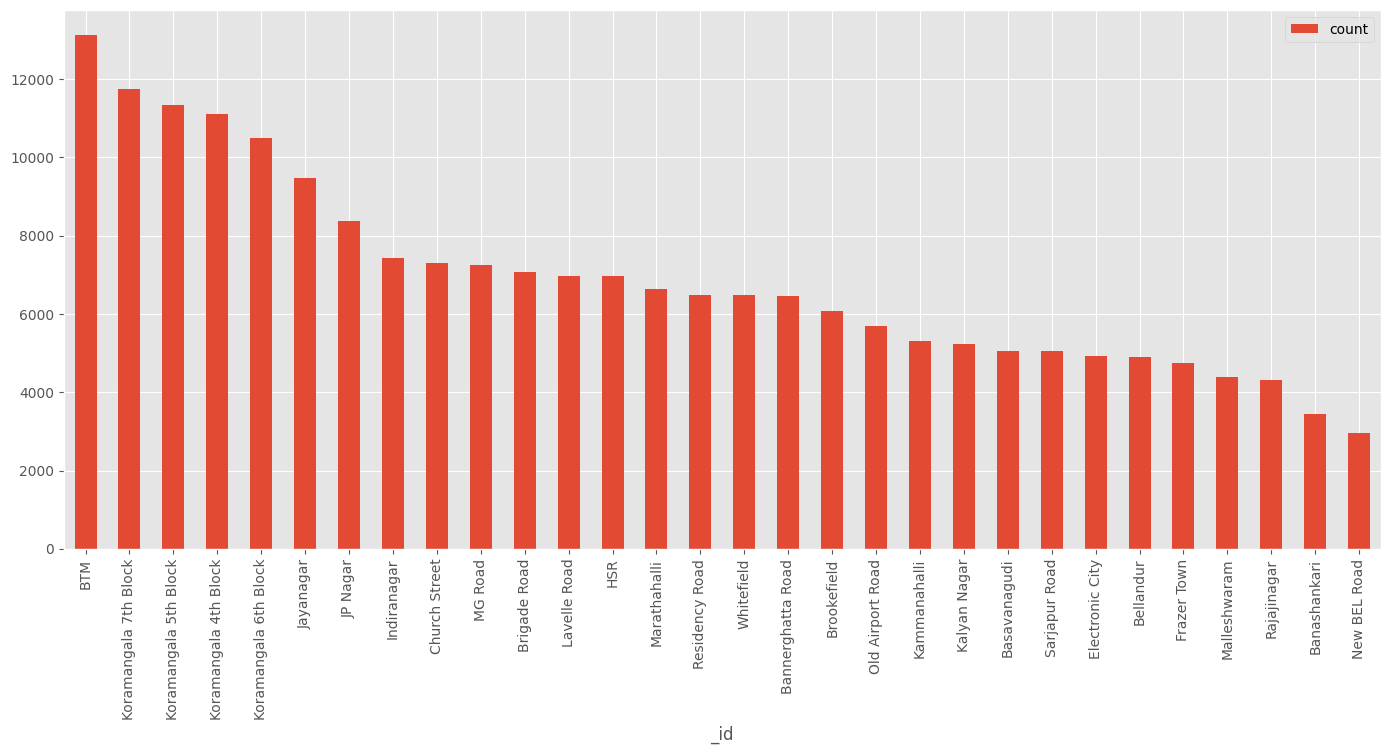

In [18]:
df.plot(kind = 'bar',x = '_id', y = 'count')

#### i. Top 5 Locations

In [19]:
q1_agg_result_1=collection.aggregate([{ "$group": {"_id": "$listed_in(city)", "count": { "$sum": 1 } } },
                                 {"$sort": { "count": -1 } },
                                {"$limit": 5}])
list(q1_agg_result_1)

[{'_id': 'BTM', 'count': 13116},
 {'_id': 'Koramangala 7th Block', 'count': 11752},
 {'_id': 'Koramangala 5th Block', 'count': 11344},
 {'_id': 'Koramangala 4th Block', 'count': 11116},
 {'_id': 'Koramangala 6th Block', 'count': 10492}]

#### ii. Last 5 Locations 

In [20]:
q1_agg_result_2=collection.aggregate([{ "$group": {"_id": "$listed_in(city)", "count": { "$sum": 1 } } },
                                 {"$sort": { "count": 1 } },
                                   {"$limit": 5}])
list(q1_agg_result_2)

[{'_id': 'New BEL Road', 'count': 2960},
 {'_id': 'Banashankari', 'count': 3452},
 {'_id': 'Rajajinagar', 'count': 4316},
 {'_id': 'Malleshwaram', 'count': 4384},
 {'_id': 'Frazer Town', 'count': 4740}]

#### Inference
    - Sales in each Area.
    - Food Consumption in each Area. 
    - People in BTM, Koramangala 4th,5th,6th,7th Block, Jayanagar are ordering more in Zomato... whereas  New BEL Road , Banashankari counts less number of orders.

### 2. Liked Dishes

In [21]:
q2=[]
for rec in collection.find({'dish_liked':{'$ne':None}}):
    q2.append(rec.get('dish_liked'))
    

In [22]:
q2

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri, Gol Gappe',
 'Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice',
 'Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza',
 'Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches',
 'Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos',
 'Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe',
 'Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos',
 'Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread',
 'Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino',
 'Chur

In [23]:
from functools import reduce
q2flatlist = reduce(lambda a,b:a+b, q2)
q2flatlist=q2flatlist.split(", ")
dfq2 = pd.DataFrame({'food':q2flatlist})
x=(dfq2['food'].value_counts())
x=x.to_frame()
x=x.set_axis(['no. of counts'], axis=1)# inplace=False)


In [24]:
q2flatlist

['Pasta',
 'Lunch Buffet',
 'Masala Papad',
 'Paneer Lajawab',
 'Tomato Shorba',
 'Dum Biryani',
 'Sweet Corn SoupMomos',
 'Lunch Buffet',
 'Chocolate Nirvana',
 'Thai Green Curry',
 'Paneer Tikka',
 'Dum Biryani',
 'Chicken BiryaniChurros',
 'Cannelloni',
 'Minestrone Soup',
 'Hot Chocolate',
 'Pink Sauce Pasta',
 'Salsa',
 'Veg Supreme PizzaMasala DosaPanipuri',
 'Gol GappeOnion Rings',
 'Pasta',
 'Kadhai Paneer',
 'Salads',
 'Salad',
 'Roti',
 'Jeera RiceFarmhouse Pizza',
 'Chocolate Banana',
 'Virgin Mojito',
 'Pasta',
 'Paneer Tikka',
 'Lime Soda',
 'Prawn PizzaPizza',
 'Mocktails',
 'Coffee',
 'Nachos',
 'Salad',
 'Pasta',
 'SandwichesWaffles',
 'Pasta',
 'Coleslaw Sandwich',
 'Choco Waffle',
 'Tacos',
 'Momos',
 'Cheese NachosWaffles',
 'Pasta',
 'Crispy Chicken',
 'Honey Chilli Chicken',
 'Sandwich',
 'Coffee',
 'CrepeMocktails',
 'Peri Fries',
 'Lasagne',
 'Pizza',
 'Chicken Bbq Wings',
 'Virgin Mojito',
 'NachosCoffee',
 'Spaghetti',
 'Pancakes',
 'Nachos',
 'Pasta',
 'Sandwi

In [25]:
x

no. of counts
food                                          
Pasta                                     9397
Cocktails                                 7076
Pizza                                     6720
Burgers                                   6088
Mocktails                                 5652
...                                        ...
Chole BhatureRice                            4
Punjabi Veg ThaliChaat                       4
Chop SueyPotato Fries                        4
Virgin PinacoladaCocktails                   4
PizzaManchow SoupButter Chicken              4

[17325 rows x 1 columns]

<Axes: ylabel='no. of counts'>

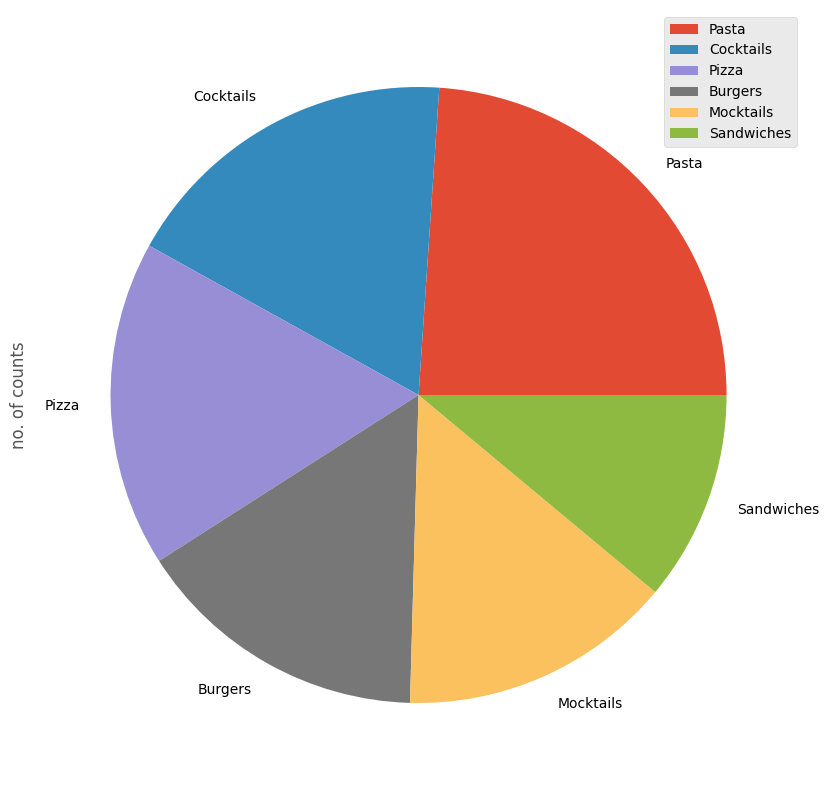

In [26]:
x[0:6].plot(kind = 'pie',y = 'no. of counts', figsize=(10, 10))

#### i. Top 5 Dishes

In [27]:
x.head(5)

no. of counts
food                    
Pasta               9397
Cocktails           7076
Pizza               6720
Burgers             6088
Mocktails           5652

#### ii. Last 5 Dishes

In [28]:
x.tail(5)

no. of counts
food                                          
Chole BhatureRice                            4
Punjabi Veg ThaliChaat                       4
Chop SueyPotato Fries                        4
Virgin PinacoladaCocktails                   4
PizzaManchow SoupButter Chicken              4

#### Inference
        - Sales of Dishes
        - Which dish is liked by more people.
        - Pasta, Cocktails, Pizza are liked by most of the people whereas Salted CaramelRasgulla, AppamFaluda , NoodlesBbq Pizza are having the least count.

### 3. Number of orders in each hotel in Bangalore

In [29]:
q3_agg_result=collection.aggregate([{ "$group": {"_id": "$name","count": { "$sum": 1 } } },
                                 {"$sort": { "count": -1 }}])

In [30]:
df = pd.DataFrame(q3_agg_result)
df

_id  count
0                 Cafe Coffee Day    384
1                          Onesta    340
2                       Just Bake    292
3               Empire Restaurant    284
4               Five Star Chicken    280
...                           ...    ...
8787                    Cafe Nosh      4
8788              Nimmoora Thindi      4
8789                      Thali15      4
8790  Calcutta North Indian Meals      4
8791            Cafe Black Pepper      4

[8792 rows x 2 columns]

<Axes: xlabel='_id'>

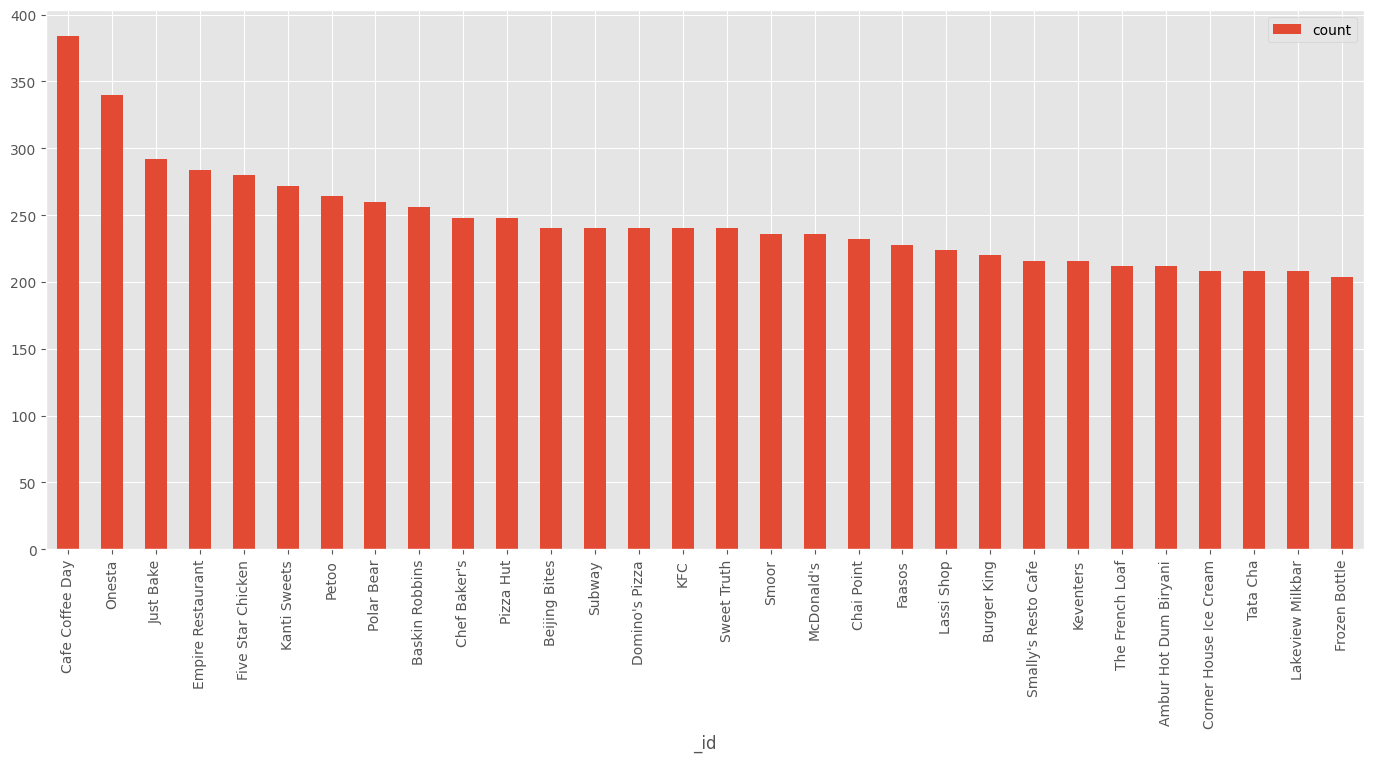

In [31]:
df[0:30].plot(kind = 'bar',x = '_id', y = 'count')

#### i. Top 5 Hotels

In [32]:
q3_agg_result_1=collection.aggregate([{ "$group": {"_id": "$name","count": { "$sum": 1 } } },
                                 {"$sort": { "count": -1 }},
                                   {"$limit": 5}])
list(q3_agg_result_1)

[{'_id': 'Cafe Coffee Day', 'count': 384},
 {'_id': 'Onesta', 'count': 340},
 {'_id': 'Just Bake', 'count': 292},
 {'_id': 'Empire Restaurant', 'count': 284},
 {'_id': 'Five Star Chicken', 'count': 280}]

#### ii. Last 5 Hotels

In [33]:
q3_agg_result_2=collection.aggregate([{ "$group": {"_id": "$name","count": { "$sum": 1 } } },
                                 {"$sort": { "count": 1 }},
                                   {"$limit": 5}])
list(q3_agg_result_2)

[{'_id': 'Prakash Cafe', 'count': 4},
 {'_id': "Tiwari's Cafe", 'count': 4},
 {'_id': 'Soms Kitchen & Bakes', 'count': 4},
 {'_id': 'Delhi Pizza House', 'count': 4},
 {'_id': 'Shreyas', 'count': 4}]

#### Inference
    - Sales in each hotel.
    - Which hotels has highest number of customers
    - Cafe Coffee Day, Onesta , Just Bake has the highest number of customers whereas Nandini Dosa Camp , Terracotta Whitefield , Bhavani Military Hotel has the least sales

### 4.Number of votes for each hotel

In [34]:
q4_agg_result=collection.aggregate([{ "$group": {"_id": "$name","votes": { "$sum": "$votes" } } },
                                 {"$sort": { "votes": -1 }}])


In [35]:
df = pd.DataFrame(q4_agg_result)
df

_id    votes
0                Onesta  1390080
1              Truffles  1204236
2     Empire Restaurant   919232
3              Hammered   722408
4       The Black Pearl   688488
...                 ...      ...
8787       Black Pepper        0
8788             Wudfyr        0
8789    Taste The Flame        0
8790        Juice Magic        0
8791  Cafe Black Pepper        0

[8792 rows x 2 columns]

<Axes: xlabel='_id'>

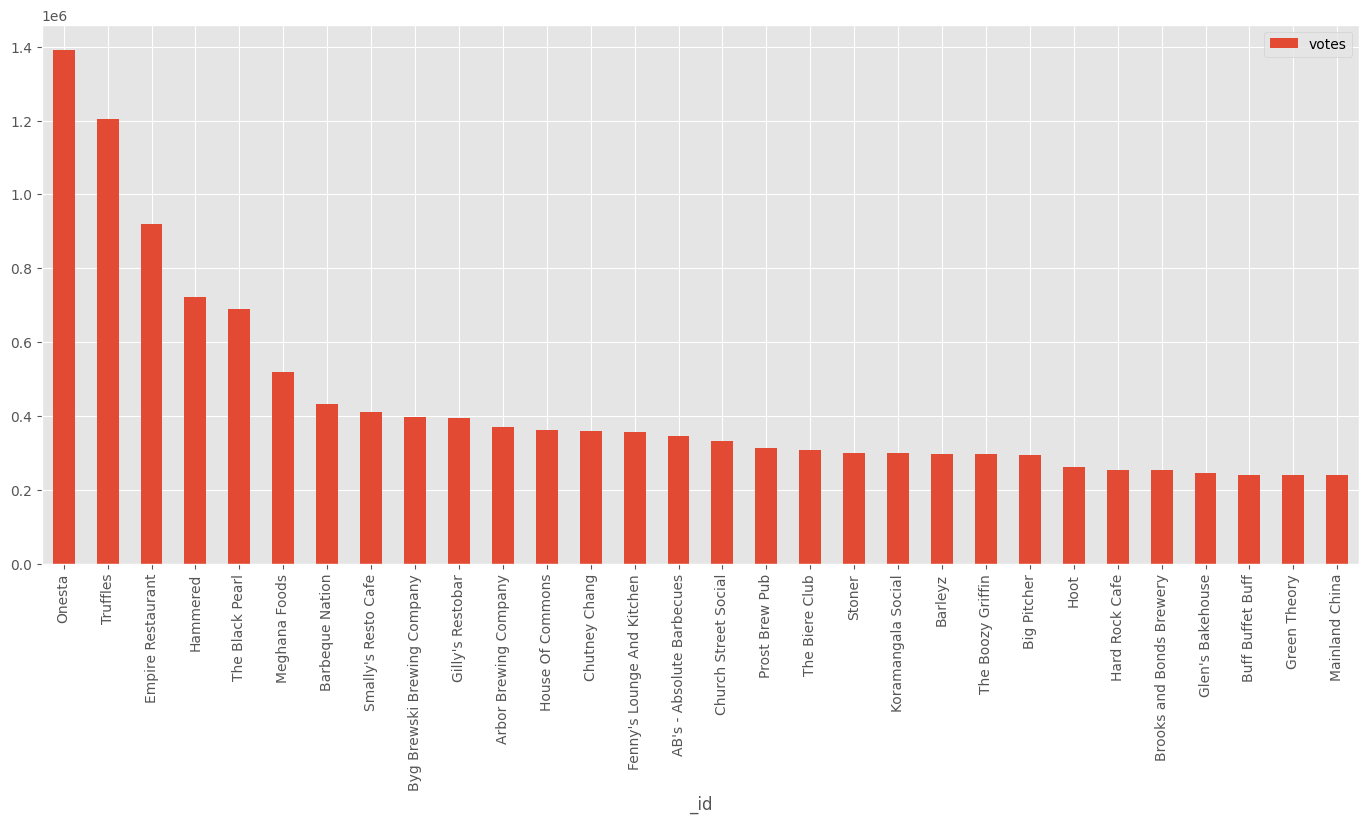

In [36]:
df[0:30].plot(kind = 'bar',x = '_id', y = 'votes')

#### i. Top 5 highly voted Hotels

In [37]:
q4_agg_result_1=collection.aggregate([{ "$group": {"_id": "$name","votes": { "$sum": "$votes" } } },
                                 {"$sort": { "votes": -1 }},
                                   {"$limit": 5}])
list(q4_agg_result_1)

[{'_id': 'Onesta', 'votes': 1390080},
 {'_id': 'Truffles', 'votes': 1204236},
 {'_id': 'Empire Restaurant', 'votes': 919232},
 {'_id': 'Hammered', 'votes': 722408},
 {'_id': 'The Black Pearl', 'votes': 688488}]

#### ii. Last 5 Hotels

In [38]:
q4_agg_result_2=collection.aggregate([{ "$group": {"_id": "$name","votes": { "$sum": "$votes" } } },
                                 {"$sort": { "votes": 1 }},
                                   {"$limit": 5}])
list(q4_agg_result_2)

[{'_id': 'Shreyas', 'votes': 0},
 {'_id': 'The Crazy Wall', 'votes': 0},
 {'_id': 'Hunger Nights', 'votes': 0},
 {'_id': 'Soms Kitchen & Bakes', 'votes': 0},
 {'_id': "Tiwari's Cafe", 'votes': 0}]

#### Inference
    - Counts of the votes for each orders wrt hotels.
    - Onesta, Truffles , Empire Restaurant are getting high votes but Zuiqa Taste, Nourich, Remos Kitchen are having least votes.

### 5. About Menu

#### i. Hotels with menu

In [39]:

q5_1=[]
for rec in collection.find({'menu_item':{'$ne':'[]'}}):
    q5_1.append(rec.get('name'))

print(len(q5_1))
print((q5_1))


48400
['Sweet Truth', 'Faasos', 'Maruthi Davangere Benne Dosa', 'Kitchen Garden', 'Recipe', 'Tasty Bytes', 'Shree Cool Point', 'FreshMenu', "Namma Brahmin's Idli", 'Sri Guru Kottureshwara Davangere Benne Dosa', 'Bengaluru Coffee House', 'Anna Kuteera', 'Vijayalakshmi', 'Sri Udupi Food Hub', 'Udupi Upahar', "New Gowda's Fried Chicken", 'HOT COFFEE', 'Sagar Deluxe', 'Grazers', 'By 2 Coffee', 'Davangere Butter Dosa Hotel', 'Mulabagilu Dosa', 'Udupi Ruchi', 'Cool Corner', 'Matru Sagar', 'In Time Cane Juice', 'Srikrishna Bhavan', 'Chumma Delicious', 'SSV Upahar', 'Dwaraka Grand', "Tanna's Kitchen", 'Shree Mandarathi Grand', 'South Kitchen', 'Shanthi Sagar', 'Kamat Bugle Rock', 'Puliyogare Point', 'Bangalore Agarwal Bhavan', 'Udupi Ruchi Grand', 'Just Thindi', 'Matru Sagar', 'Vasanth Vihar - Since 1965', 'Mast Punjabi', 'South Grand', 'Dakshin Grand', 'Chai Mane', 'Kaapi Kendra', 'The Krishna Grand Xpress', 'Coffee Tindi', 'Drunken Monkey', 'Lalbagh Grand', 'Sri Krishna Aramane', 'Swarga Ruc

#### ii. Hotels without menu

In [69]:
#5.2 hotels without menu
q5_2=[]
for rec in collection.find({'menu_item':{'$eq':'[]'}}):
    q5_2.append(rec.get('name'))

print(len(q5_2))
print((q5_2))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



#### Inference
    - In this data there are hotels with menu and without menu so we can separate it request them to give their menu.
    - 12100 hotels are having menu.
    - 39617 hotels are not having their menu.

### 6. About table booking and online ordering

In [41]:
q6_agg_result=collection.aggregate([{ "$group": {"_id": {"booking table": "$book_table","online order": "$online_order"},"count": { "$addToSet": "$name" } }},
                                   {"$sort": { "_id": -1 }}])

In [42]:
for res in list(q6_agg_result):
    print(res.get('_id'),len(res.get('count')))

{'booking table': 'Yes', 'online order': 'Yes'} 427
{'booking table': 'Yes', 'online order': 'No'} 418
{'booking table': 'No', 'online order': 'Yes'} 4047
{'booking table': 'No', 'online order': 'No'} 4798


#### Inference
    - From this we can get Booking and Online ordering information

### 7. Number of orders in each hotel in each Area in Bangalore

In [43]:
q7_agg_result= collection.aggregate([{"$group": {"_id": {"name":"$name" ,"location":"$location" },"count": { "$sum": 1 }}},
                                    {"$sort": { "count": -1 }}])

list(q7_agg_result)

[{'_id': {'name': 'Hammered', 'location': 'Cunningham Road'}, 'count': 136},
 {'_id': {'name': 'Dolci Desserts', 'location': 'Cunningham Road'},
  'count': 100},
 {'_id': {'name': 'The Chocolate Heaven', 'location': 'Commercial Street'},
  'count': 96},
 {'_id': {'name': 'Tiger Trail - Ramada Hotel', 'location': 'Shivajinagar'},
  'count': 92},
 {'_id': {'name': 'Berrylicious Cafe', 'location': 'MG Road'}, 'count': 88},
 {'_id': {'name': 'ThrowBack - Pub & Dine', 'location': 'Langford Town'},
  'count': 88},
 {'_id': {'name': 'Hatti Punjab Di', 'location': 'Brigade Road'}, 'count': 88},
 {'_id': {'name': 'Cilantro', 'location': 'Koramangala 4th Block'},
  'count': 84},
 {'_id': {'name': 'Bonsouth', 'location': 'Koramangala 5th Block'},
  'count': 84},
 {'_id': {'name': 'Chillout', 'location': 'BTM'}, 'count': 84},
 {'_id': {'name': 'Bistro Claytopia', 'location': 'Koramangala 1st Block'},
  'count': 84},
 {'_id': {'name': 'Tangerine - Davanam Sarovar Portico Suites',
   'location': 'Ko

#### i. Top 5  orders in Hotels w.r.t towns

In [44]:
q7_agg_result_1= collection.aggregate([{"$group": {"_id": {"name":"$name" ,"location":"$location" },"count": { "$sum": 1 }}},
                                    {"$sort": { "count": -1 }},
                                    {"$limit": 5}])

list(q7_agg_result_1)

[{'_id': {'name': 'Hammered', 'location': 'Cunningham Road'}, 'count': 136},
 {'_id': {'name': 'Dolci Desserts', 'location': 'Cunningham Road'},
  'count': 100},
 {'_id': {'name': 'The Chocolate Heaven', 'location': 'Commercial Street'},
  'count': 96},
 {'_id': {'name': 'Tiger Trail - Ramada Hotel', 'location': 'Shivajinagar'},
  'count': 92},
 {'_id': {'name': 'Hatti Punjab Di', 'location': 'Brigade Road'}, 'count': 88}]

#### ii. Least 5  orders in Hotels w.r.t towns

In [45]:
# 7 hotels in each town
q7_agg_result_2= collection.aggregate([{"$group": {"_id": {"name":"$name" ,"location":"$location" },"count": { "$sum": 1 }}},
                                    {"$sort": { "count": 1 }},
                                    {"$limit": 5}])

list(q7_agg_result_2)

[{'_id': {'name': "McDonald's Play Place", 'location': 'Electronic City'},
  'count': 4},
 {'_id': {'name': 'Ganga Sagar', 'location': 'Basavanagudi'}, 'count': 4},
 {'_id': {'name': 'Bhukkad', 'location': 'Electronic City'}, 'count': 4},
 {'_id': {'name': "Taiyvan's", 'location': 'RT Nagar'}, 'count': 4},
 {'_id': {'name': 'Kulfi & More', 'location': 'Banashankari'}, 'count': 4}]

#### Inference
    - Sales in each town in Banglore

### 8. Available cuisines

In [46]:
# 8 most available cuisins
q8_agg_result= collection.aggregate([{"$group": {"_id":"$cuisines"}}])
q8=[]
for res in list(q8_agg_result):
    q8.append(res.get('_id'))


In [47]:
q8=np.array(q8)
q8_1=np.array([])
for i in range(len(q8)):
    q8i=q8[i]
    q8_1=np.append(q8_1,(np.array(str(q8i).split(", "))))
dfq8 = pd.DataFrame({'cusins':q8_1})
x=(dfq8['cusins'].value_counts())
x=x.to_frame()
x=x.set_axis(['no. of counts'], axis=1)

In [48]:
x

no. of counts
cusins                     
North Indian           1208
Chinese                1027
Fast Food               554
Continental             543
South Indian            497
...                     ...
Sindhi                    1
Mongolian                 1
Raw Meats                 1
Russian                   1
Paan                      1

[108 rows x 1 columns]

<Axes: xlabel='cusins'>

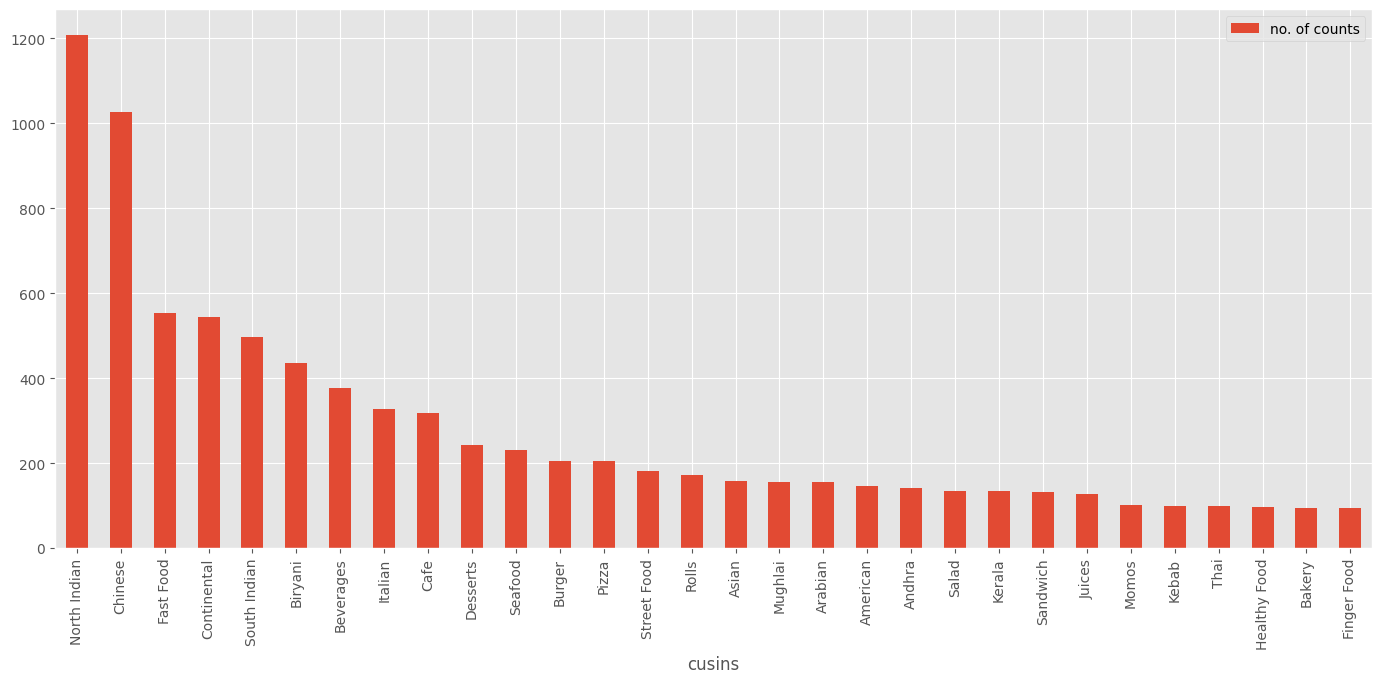

In [49]:
x[0:30].plot(kind = 'bar', y = 'no. of counts')

<Axes: xlabel='cusins'>

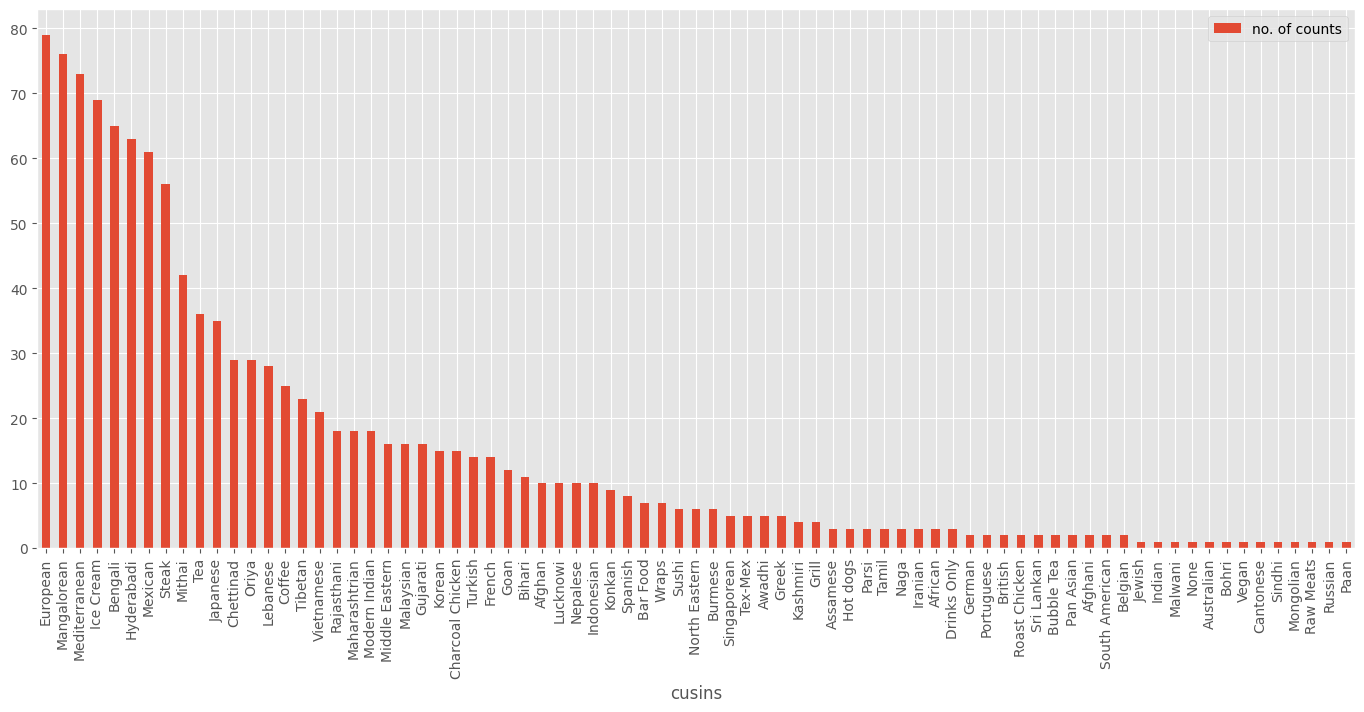

In [50]:
x[31:].plot(kind = 'bar', y = 'no. of counts')

#### i. Top 5 cuisines

In [51]:
x.head(5)

no. of counts
cusins                     
North Indian           1208
Chinese                1027
Fast Food               554
Continental             543
South Indian            497

#### ii. Least 5 cuisines

In [52]:
x.tail(5)

no. of counts
cusins                  
Sindhi                 1
Mongolian              1
Raw Meats              1
Russian                1
Paan                   1

#### Inference
    - Availablity of cusins in Banglore

### 9. Cost efficient And Quality hotels

In [53]:
q9_agg_result= collection.aggregate([{"$group": {"_id":"$name" ,"rating": { "$addToSet":"$rate" },"approx_cost": { "$avg":"$approx_cost(for two people)"} }},
                                      {"$sort": { "_id": -1 }}])
    
val9=[]
for res in list(q9_agg_result):
    l2=[]
    for i in (list(res.get('rating'))):
#         print(i)
        if(i!=None):
            if "/" in i:
                l2.append(float(i.split( "/" )[0]))
    val9.append([res.get('_id'),l2,res.get('approx_cost')])   
    
    
q9_1=[]
for i in val9:
    if (len(i[1])!=0):
        q9_1.append([i[0],round(np.average(i[1]),2),i[2]])
        
        
df=pd.DataFrame(q9_1)
# df.head(5)
df.columns=['name','rating','cost (two persons)']
df=df.dropna()
df.sort_values(by=['rating','cost (two persons)'],ascending=[False,True], na_position = 'first')

name  rating  cost (two persons)
6016  Belgian Waffle Factory    4.85               400.0
2487      O.G. Variar & Sons    4.80               200.0
5683                     CTR    4.75               150.0
1018            Taaza Thindi    4.70               100.0
2960        Milano Ice Cream    4.70               400.0
...                      ...     ...                 ...
2998         Meghana Biryani    2.30               800.0
5979                 Bhagini    2.28               800.0
953          Taste Of Kerala    2.23               600.0
6140                Bageecha    2.15               650.0
5030           Decker's Lane    2.10               400.0

[5804 rows x 3 columns]

array([<Axes: title={'center': 'rating'}, xlabel='name'>,
       <Axes: title={'center': 'cost (two persons)'}, xlabel='name'>],
      dtype=object)

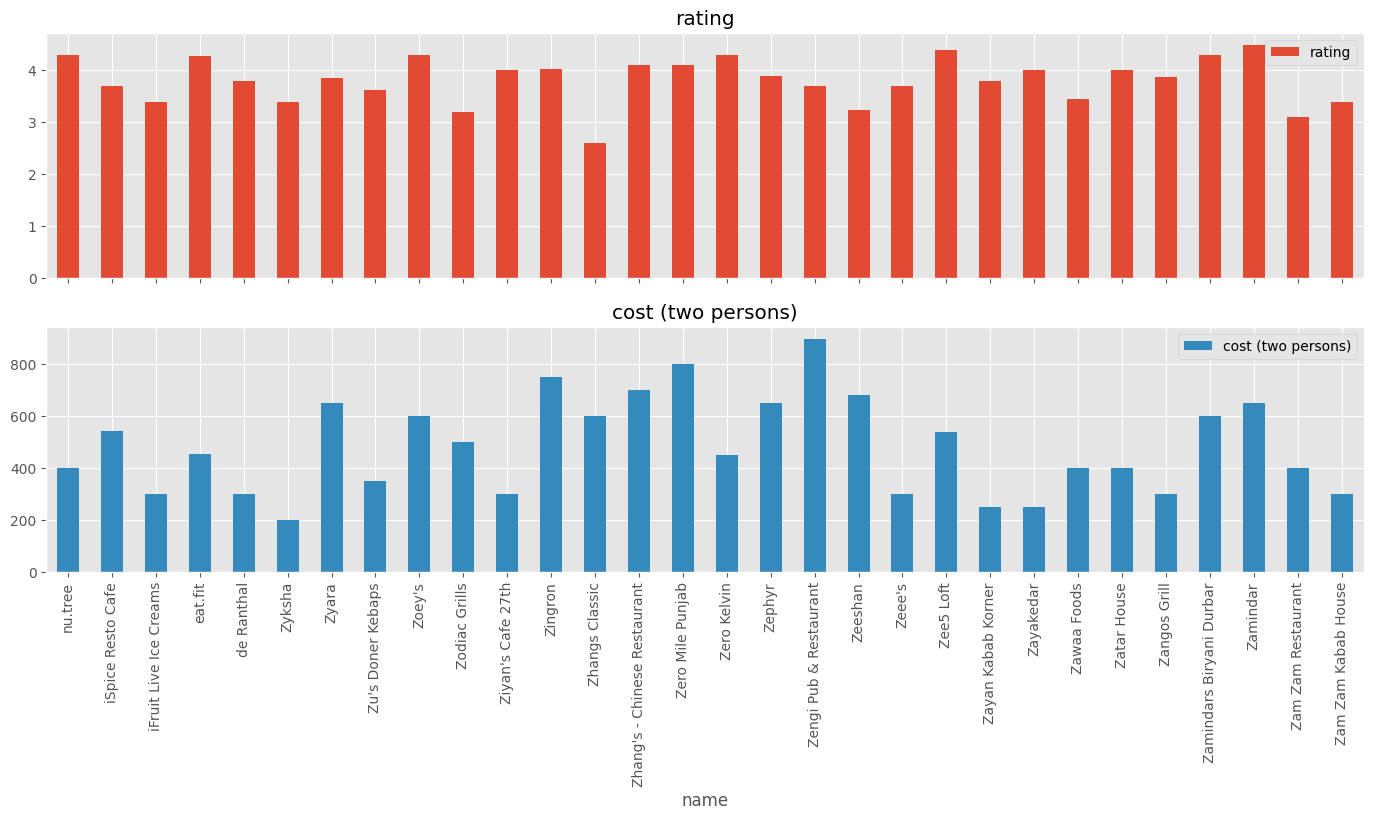

In [54]:
df[0:30].plot(subplots=True,kind = 'bar',x='name')

In [55]:
#thresolds
high_rating=4.5
low_rating =3.5
high_cost = 500
low_cost=500

#### i. Best hotels 
##### (high rating (> 4.5), low cost (<500)) 

In [56]:
df[(df['rating'] > high_rating) & (df['cost (two persons)'] <low_cost)]

name  rating  cost (two persons)
600          The Pancake Story    4.60               300.0
817   The Blue Wagon - Kitchen    4.60               400.0
1018              Taaza Thindi    4.70               100.0
2487        O.G. Variar & Sons    4.80               200.0
2845         Mugful Of Stories    4.60               300.0
2960          Milano Ice Cream    4.70               400.0
3416              Kurtoskalacs    4.65               390.0
4893              Dock Frost'd    4.60               400.0
5683                       CTR    4.75               150.0
6016    Belgian Waffle Factory    4.85               400.0

#### ii. Average hotels 
##### (low rating (<3.5), high cost (>500)) & (high rating (>4.5), high cost (>500))

In [57]:
df[((df['rating'] < low_rating) & (df['cost (two persons)'] >low_cost))|((df['rating'] > high_rating) & (df['cost (two persons)'] >high_cost))].sort_values(by=['rating','cost (two persons)'],ascending=[False,False], na_position = 'first')

name  rating  cost (two persons)
4825  ECHOES Koramangala    4.70               750.0
3257     Lot Like Crepes    4.63               550.0
401             Truffles    4.60               900.0
6151          Baar Union    4.60               850.0
4225          Here & Now    4.60               750.0
...                  ...     ...                 ...
2131      Punjabi Daawat    2.40               550.0
2998     Meghana Biryani    2.30               800.0
5979             Bhagini    2.28               800.0
953      Taste Of Kerala    2.23               600.0
6140            Bageecha    2.15               650.0

[419 rows x 3 columns]

#### iii. Below Average hotels 
#####               (low rating(<3.5), low cost(<500))

In [58]:
df[(df['rating'] < low_rating) & (df['cost (two persons)'] <low_cost)]

name  rating  cost (two persons)
3            iFruit Live Ice Creams    3.40               300.0
9                            Zyksha    3.40               200.0
30                      Zawaa Foods    3.45               400.0
36               Zam Zam Restaurant    3.10               400.0
37              Zam Zam Kabab House    3.40               300.0
...                             ...     ...                 ...
6614  360 Atoms Restaurant And Cafe    3.10               400.0
6622              24/7 Food Service    2.95               300.0
6634               1980s Games Cafe    3.40               400.0
6645                       1000 B.C    3.20               300.0
6648                   #FeelTheROLL    3.40               200.0

[1661 rows x 3 columns]

### 10. About Rest type

In [59]:
q10_agg_res = collection.aggregate([{"$group": {"_id":{"name":"$name" },"rest type": { "$addToSet":"$rest_type" }}},
                                   ])

In [60]:
((list(q10_agg_res)))

[{'_id': {'name': 'Udupi South Saviruchi'}, 'rest type': ['Quick Bites']},
 {'_id': {'name': 'The Blue Wagon - Kitchen'}, 'rest type': ['Cafe']},
 {'_id': {'name': 'Bengaluru Square'}, 'rest type': ['Quick Bites']},
 {'_id': {'name': 'Biryani Point'}, 'rest type': ['Quick Bites']},
 {'_id': {'name': "Tiwari's Cafe"}, 'rest type': ['Delivery']},
 {'_id': {'name': 'Lazeez'},
  'rest type': ['Casual Dining', 'Takeaway, Delivery']},
 {'_id': {'name': 'Shreyas'}, 'rest type': ['Quick Bites']},
 {'_id': {'name': 'House Of Wholewheat'}, 'rest type': ['Bakery']},
 {'_id': {'name': 'Crescent Avenue - Hotel Bangalore International'},
  'rest type': ['Casual Dining']},
 {'_id': {'name': 'Krish Punjabi Kitchen'}, 'rest type': ['Quick Bites']},
 {'_id': {'name': 'El Salver'}, 'rest type': ['Casual Dining']},
 {'_id': {'name': 'Maia - Eat | Bake | Mom'}, 'rest type': ['Casual Dining']},
 {'_id': {'name': 'Prakash Cafe'}, 'rest type': ['Casual Dining']},
 {'_id': {'name': 'Biryani Hub'}, 'rest type':

In [61]:
for res in list(q10_agg_res):
     if (len(res.get('rest type'))>1):
            print(res.get('_id'),len(res.get('rest type'))) 

#### Collecting data wrt hotel names

In [62]:
q10_agg_res_1 = collection.aggregate([ { "$match": { "name": 'Lassi Magic' } },{"$group": {"_id":{"name":"$name" },"rest type": { "$addToSet":"$rest_type" }}},
                                   ])

In [63]:
(list(q10_agg_res_1))

[{'_id': {'name': 'Lassi Magic'},
  'rest type': ['Quick Bites', 'Beverage Shop']}]

#### Collecting data wrt Rest type

In [64]:
q10_agg_res_2 = collection.aggregate([ { "$match": { "rest_type": 'Beverage Shop' } },{"$group": {"_id":{"rest_type":"$rest_type" },"name": { "$addToSet":"$name" }}},
                                   ])

In [65]:
(list(q10_agg_res_2))

[{'_id': {'rest_type': 'Beverage Shop'},
  'name': ['Lashiwalla',
   'Chai Culture',
   'Sreeraj Lassi Bar',
   'Fruit Punch',
   'Kettle & Kegs',
   'Shree Ganesh Fruit Juice Centre',
   'Double Blend',
   'Juice Magic',
   'Chaai Resto',
   'The Crunch',
   'Lassi Cafe',
   'Green Go',
   'Makers of Milkshakes',
   "Bery's Cafe",
   'Milkacium',
   'Lassi Magic',
   'The London Shakes',
   'Ice Cafe & Lassi Shop',
   'Shake it Off',
   'House Of Lassi',
   'The Juicy',
   'Breezy Cow Bar',
   'Chill Magic',
   'Juice Fresco',
   'Assi Tussi Lassi',
   'Nutripress',
   '5 Degree Centigrade',
   'Jugo Fresh',
   'Tasty Jigarthanda',
   'Chai Street',
   'Classic Lassi Shop',
   'Lassi Zone',
   'Juice Buzz',
   'Savera Lassi Shop',
   'AM WOW',
   'The Lassi Bar',
   'Juicemaker',
   'Only Sharjah',
   'Choconut',
   'Smoodies',
   'Juice Berg',
   'Bottle Genie',
   'In Time Cane Juice',
   'Sky Juice Corner',
   'The Lassi Park',
   'Feel The Taste',
   'Frosty Bite',
   'Xpress Chai

### 11. Best rated hotels

In [66]:
q11_agg_res = collection.aggregate([{"$group": {"_id":"$name","rating": { "$addToSet":"$rate" },"value": { "$sum": "$votes" }}},
                                   {"$sort": { "value":-1}}])

In [67]:
list(q11_agg_res)

[{'_id': 'Onesta',
  'rating': ['4.4 /5', '4.6 /5', '4.5/5', '4.4/5', '4.3 /5', '4.3/5', '4.6/5'],
  'value': 1390080},
 {'_id': 'Truffles',
  'rating': ['4.5/5', '4.7 /5', '4.7/5', '4.6/5', '4.5 /5'],
  'value': 1204236},
 {'_id': 'Empire Restaurant',
  'rating': ['4.0/5',
   '4.2/5',
   '3.8 /5',
   '4.1 /5',
   '3.5 /5',
   '4.1/5',
   '3.6/5',
   '4.4/5',
   '4.4 /5',
   'NEW',
   '3.5/5',
   '3.6 /5',
   '3.9/5',
   '3.7 /5',
   '4.0 /5',
   '3.9 /5',
   '3.8/5',
   '4.3/5'],
  'value': 919232},
 {'_id': 'Hammered',
  'rating': ['4.7/5', '4.6 /5', 'NEW', '4.3 /5', '4.7 /5', '4.4 /5', '4.5 /5'],
  'value': 722408},
 {'_id': 'The Black Pearl',
  'rating': ['4.7 /5', '4.8/5', '4.7/5', '4.8 /5'],
  'value': 688488},
 {'_id': 'Meghana Foods',
  'rating': ['4.2/5',
   '4.3/5',
   '4.5 /5',
   '4.4/5',
   '4.4 /5',
   '4.3 /5',
   '4.2 /5',
   '4.5/5'],
  'value': 518228},
 {'_id': 'Barbeque Nation',
  'rating': ['4.4/5',
   '4.7 /5',
   '3.8/5',
   '4.2 /5',
   '4.7/5',
   '4.2/5',
   '

In [70]:
val11=[]
for res in list(q11_agg_res):
    l2=[]
    for i in (list(res.get('rating'))):
#         print(i)
        if(i!=None):
            if "/" in i:
                l2.append(float(i.split( "/" )[0]))
    val11.append([res.get('_id'),l2,res.get('value')])   
    
    
q111=[]
for i in val11:
    if (len(i[1])!=0):
        q111.append([i[0],round(np.average(i[1]),2),i[2]])
        
       
df=pd.DataFrame(q111)
df.columns=['name','rating','votes'] 
df=df.dropna()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

In [ ]:
df

In [ ]:
df.sort_values(by=['rating','votes'],ascending=[False,False], na_position = 'first')

In [ ]:
df[0:30].plot(subplots=True,kind = 'bar',x='name')

In [ ]:
#thresolds
high_rating=4.5
low_rating =3.5
high_votes = 50000
low_votes=10000

#### i. more than 4.5 stars and 50k votes

In [ ]:
df[(df['rating'] > high_rating) & (df['votes'] > high_votes)]

#### ii. less than 3. stars and 10k votes

In [ ]:
df[(df['rating'] < low_rating) & (df['votes'] < low_votes)]

#### Inference
    - From this we can get Best rated hotels in the city
    - Quality of the hotels lies in number of votes and rating
    - So wrt stars and votes thresolds we classified the hotels into 3 types
    